In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from feature_engine.outliers import winsorizer
import scipy.stats as stats
import pylab
data = pd.read_csv(r"C:\Users\ADMIN\Desktop\SAMPLEMIODATA.csv")

In [2]:
#properly dataset uploded or not
data.head()

,BillDate,TQty,Returned,Quantity,UCPwithoutGST,PurGSTPer,MRP,TotalCost,TotalDiscount,NetSales,ReturnMRP,GenericName,SubCategory,SubCategoryL3,AnonymizedBillNo,AnonymizedSpecialisation
0,10-03-2020,1,0,1,5.03,12,12.81,5.63,0,12.81,0.00,ONDANSETRON 2MG/ML,INJECTIONS,GASTROINTESTINAL & HEPATOBILIARY SYSTEM,ANON00001,spec6
1,06-11-2020,-5,-5,0,9.75,0,17.65,54.60,0,0.00,88.25,SODIUM CHLORIDE 0.9%,"IV FLUIDS, ELECTROLYTES, TPN",INTRAVENOUS & OTHER STERILE SOLUTIONS,ANON00002,spec3
2,12-02-2020,1,0,1,51.96,0,67.51,58.20,0,67.51,0.00,FOLIC ACID 5MG,TABLETS & CAPSULES,VITAMINS & MINERALS,ANON00003,spec1
3,28-11-2020,1,0,1,39.00,0,54.00,43.68,0,54.00,0.00,LIDOCAINE/LIGNOCAINE (2%) INJ,INJECTIONS,ANAESTHETICS,ANON00004,spec11
4,29-09-2020,2,0,2,43.00,0,60.24,96.32,0,120.48,0.00,METHYLPREDNISOLONE 40MG INJ,INJECTIONS,HORMONES,ANON00005,spec2


In [3]:
#data types of datasets 
data.dtypes

BillDate                     object
TQty                          int64
Returned                      int64
Quantity                      int64
UCPwithoutGST               float64
PurGSTPer                     int64
MRP                         float64
TotalCost                   float64
TotalDiscount                 int64
NetSales                    float64
ReturnMRP                   float64
GenericName                  object
SubCategory                  object
SubCategoryL3                object
AnonymizedBillNo             object
AnonymizedSpecialisation     object
dtype: object

In [4]:
#change datatypes 'object' to 'datetime64'.
data['BillDate'] = pd.to_datetime(data['BillDate'], format='%d-%m-%Y')

data.dtypes

BillDate                    datetime64[ns]
TQty                                 int64
Returned                             int64
Quantity                             int64
UCPwithoutGST                      float64
PurGSTPer                            int64
MRP                                float64
TotalCost                          float64
TotalDiscount                        int64
NetSales                           float64
ReturnMRP                          float64
GenericName                         object
SubCategory                         object
SubCategoryL3                       object
AnonymizedBillNo                    object
AnonymizedSpecialisation            object
dtype: object

In [5]:
#finding null values
data.isnull().sum()

BillDate                    0
TQty                        0
Returned                    0
Quantity                    0
UCPwithoutGST               0
PurGSTPer                   0
MRP                         0
TotalCost                   0
TotalDiscount               0
NetSales                    0
ReturnMRP                   0
GenericName                 0
SubCategory                 0
SubCategoryL3               0
AnonymizedBillNo            0
AnonymizedSpecialisation    0
dtype: int64

In [6]:
#finding duplicates
data.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
84995    False
84996    False
84997    False
84998    False
84999    False
Length: 85000, dtype: bool

In [7]:
data.info

<bound method DataFrame.info of         BillDate  TQty  Returned  Quantity  UCPwithoutGST  PurGSTPer      MRP  \
0     2020-03-10     1         0         1           5.03         12    12.81   
1     2020-11-06    -5        -5         0           9.75          0    17.65   
2     2020-02-12     1         0         1          51.96          0    67.51   
3     2020-11-28     1         0         1          39.00          0    54.00   
4     2020-09-29     2         0         2          43.00          0    60.24   
...          ...   ...       ...       ...            ...        ...      ...   
84995 2022-03-16     2         0         2        4380.00          0  7238.00   
84996 2022-09-22     4         0         4          54.57          0    99.23   
84997 2022-01-25     1         0         1          39.00          0   602.55   
84998 2022-08-16    -1        -1         0        3900.00          0  6340.00   
84999 2022-09-02     1         0         1          69.00          0   254.50

In [9]:
#First Moment of business decision/ Mesures of Central Tendency
data.Returned.mean()

-0.28851764705882355

In [10]:
data.Returned.median()

0.0

In [11]:
data.Returned.mode()

0    0
Name: Returned, dtype: int64

In [12]:
data.Quantity.mean()

2.0032823529411763

In [13]:
data.Quantity.median()

1.0

In [14]:
data.Quantity.mode()

0    1
Name: Quantity, dtype: int64

In [15]:
data.TotalCost.mean()

538.6967051764706

In [16]:
data.TotalCost.median()

77.28

In [17]:
data.TotalCost.mode()

0    10.92
Name: TotalCost, dtype: float64

In [18]:
data.NetSales.mean()

963.8482269411766

In [19]:
data.NetSales.median()

99.4

In [20]:
data.NetSales.mode()

0    0.0
Name: NetSales, dtype: float64

In [21]:
data.ReturnMRP.mean()

116.06156470588233

In [22]:
data.ReturnMRP.median()

0.0

In [23]:
data.ReturnMRP.mode()

0    0.0
Name: ReturnMRP, dtype: float64

In [24]:
#second moment of business decision/ Mesures of Dispersion
data.Returned.var()

2.9405803976867424

In [25]:
data.Returned.std()

1.7148120589985196

In [26]:
range = max(data.Returned) - min(data.Returned)
range

378

In [27]:
data.Quantity.var()

6.261251123226877

In [28]:
data.Quantity.std()

2.502249212853683

In [29]:
range = max(data.Quantity) - min(data.Quantity)
range

120

In [30]:
data.TotalCost.var()

4531544.065922315

In [31]:
data.TotalCost.std()

2128.742367202362

In [32]:
range = max(data.TotalCost) - min(data.TotalCost)
range

121054.5

In [33]:
data.NetSales.var()

10255711.276845926

In [34]:
data.NetSales.std()

3202.4539460928904

In [35]:
range = max(data.NetSales) - min(data.NetSales)
range

100620.0

In [36]:
data.ReturnMRP.var()

1211865.4780047724

In [37]:
data.ReturnMRP.std()

1100.8476179766083

In [38]:
range = max(data.ReturnMRP) - min(data.ReturnMRP)
range

160801.2

In [39]:
#Third Moment of Decision
data.Returned.skew()

-129.047856118093

In [40]:
data.Quantity.skew()

8.809673900149171

In [41]:
data.TotalCost.skew()

14.18124863820681

In [42]:
data.NetSales.skew()

8.98366995255872

In [43]:
data.ReturnMRP.skew()

48.25126037535947

In [44]:
#Fourth moment of Business
data.Returned.kurt()

27745.768837944725

In [45]:
data.Quantity.kurt()

197.0920889776355

In [46]:
data.TotalCost.kurt()

376.76461065920995

In [47]:
data.NetSales.kurt()

145.64830617051908

In [48]:
data.ReturnMRP.kurt()

5617.403034289755

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_10560\1574295997.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data['Returned'], shade=True)


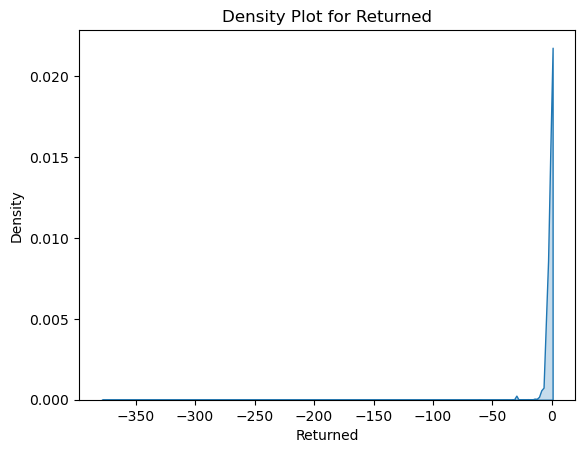

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_10560\1574295997.py:13: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data['Quantity'], shade=True)


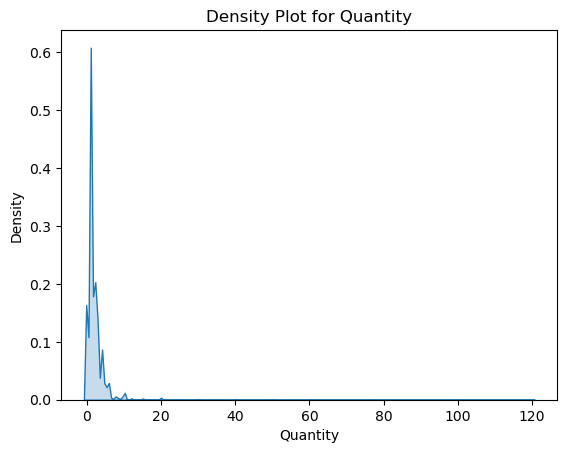

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_10560\1574295997.py:24: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data['TotalCost'], shade=True)


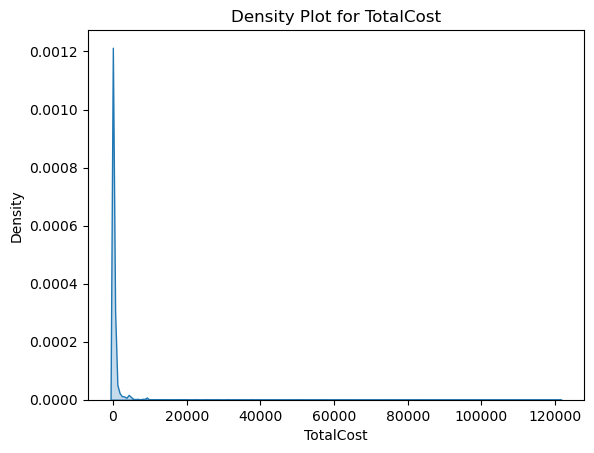

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_10560\1574295997.py:37: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data['NetSales'], shade=True)


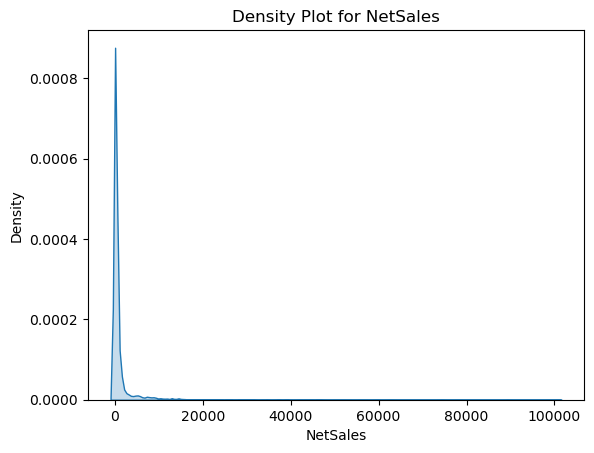

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_10560\1574295997.py:50: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data['ReturnMRP'], shade=True)


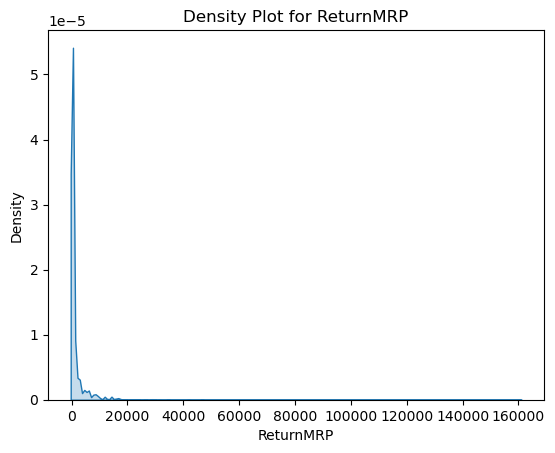

In [55]:
# Create a density plot for the 'Returned' column
sns.kdeplot(data['Returned'], shade=True)

# Customize the plot
plt.title('Density Plot for Returned')
plt.xlabel('Returned')
plt.ylabel('Density')

# Show the plot
plt.show()

# Create a density plot for the 'Quantity' column
sns.kdeplot(data['Quantity'], shade=True)

# Customize the plot
plt.title('Density Plot for Quantity')
plt.xlabel('Quantity')
plt.ylabel('Density')

# Show the plot
plt.show()

# Create a density plot for the 'TotalCost' column
sns.kdeplot(data['TotalCost'], shade=True)

# Customize the plot
plt.title('Density Plot for TotalCost')
plt.xlabel('TotalCost')
plt.ylabel('Density')

# Show the plot
plt.show()



# Create a density plot for the 'NetSales' column
sns.kdeplot(data['NetSales'], shade=True)

# Customize the plot
plt.title('Density Plot for NetSales')
plt.xlabel('NetSales')
plt.ylabel('Density')

# Show the plot
plt.show()



# Create a density plot for the 'ReturnMRP' column
sns.kdeplot(data['ReturnMRP'], shade=True)

# Customize the plot
plt.title('Density Plot for ReturnMRP')
plt.xlabel('ReturnMRP')
plt.ylabel('Density')

# Show the plot
plt.show()

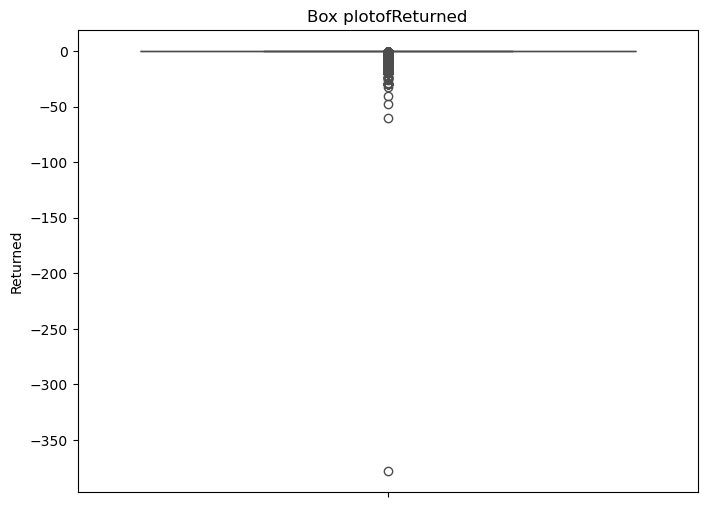

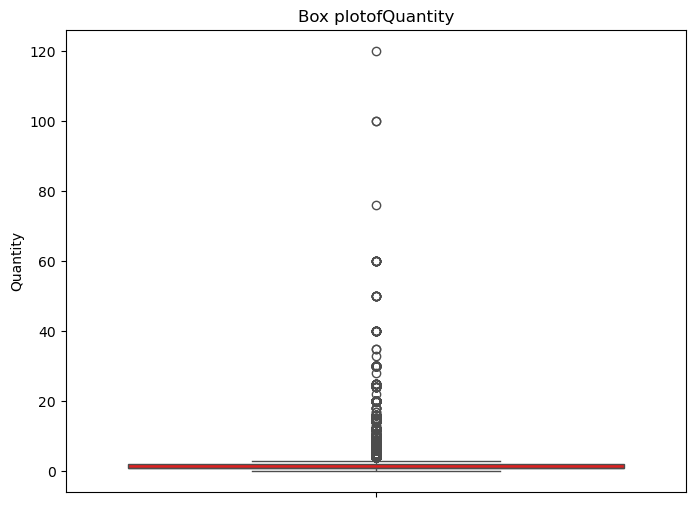

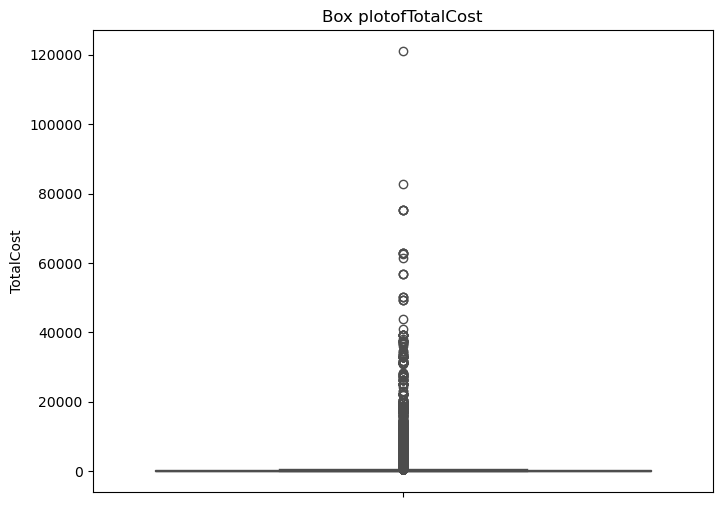

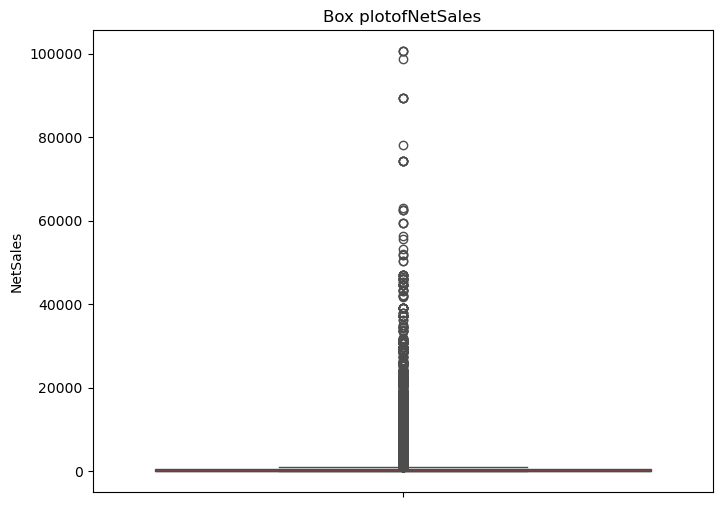

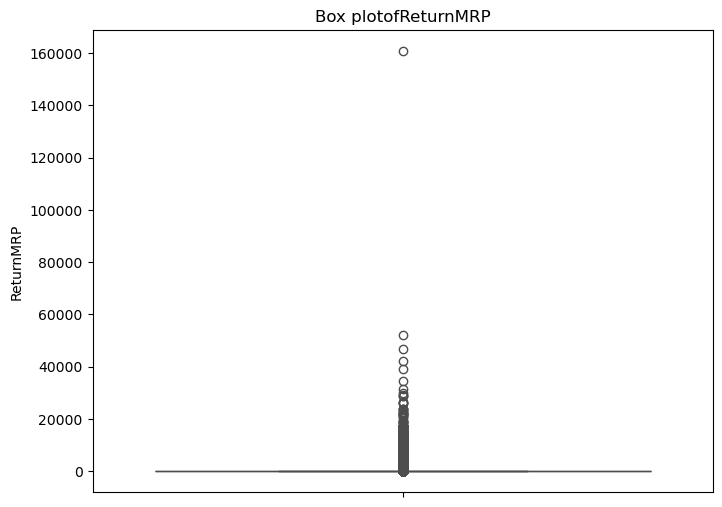

In [49]:
columns_plot = ['Returned','Quantity','TotalCost','NetSales','ReturnMRP']
for column in columns_plot:
    plt.figure(figsize=(8,6))
    sns.boxplot(data= data,y= column, color='red')
    plt.title(f'Box plotof{column}')
    plt.ylabel(column)
    plt.show()

In [50]:
data

,BillDate,TQty,Returned,Quantity,UCPwithoutGST,PurGSTPer,MRP,TotalCost,TotalDiscount,NetSales,ReturnMRP,GenericName,SubCategory,SubCategoryL3,AnonymizedBillNo,AnonymizedSpecialisation
0,2020-03-10,1,0,1,5.03,12,12.81,5.63,0,12.81,0.00,ONDANSETRON 2MG/ML,INJECTIONS,GASTROINTESTINAL & HEPATOBILIARY SYSTEM,ANON00001,spec6
1,2020-11-06,-5,-5,0,9.75,0,17.65,54.60,0,0.00,88.25,SODIUM CHLORIDE 0.9%,"IV FLUIDS, ELECTROLYTES, TPN",INTRAVENOUS & OTHER STERILE SOLUTIONS,ANON00002,spec3
2,2020-02-12,1,0,1,51.96,0,67.51,58.20,0,67.51,0.00,FOLIC ACID 5MG,TABLETS & CAPSULES,VITAMINS & MINERALS,ANON00003,spec1
3,2020-11-28,1,0,1,39.00,0,54.00,43.68,0,54.00,0.00,LIDOCAINE/LIGNOCAINE (2%) INJ,INJECTIONS,ANAESTHETICS,ANON00004,spec11
4,2020-09-29,2,0,2,43.00,0,60.24,96.32,0,120.48,0.00,METHYLPREDNISOLONE 40MG INJ,INJECTIONS,HORMONES,ANON00005,spec2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84995,2022-03-16,2,0,2,4380.00,0,7238.00,9198.00,0,14476.00,0.00,HUMAN ALBUMIN 25% INJ,"IV FLUIDS, ELECTROLYTES, TPN",INTRAVENOUS & OTHER STERILE SOLUTIONS,ANON76812,spec3
84996,2022-09-22,4,0,4,54.57,0,99.23,244.47,0,396.92,0.00,PIPERACILLIN 1GM + TAZOBACTAM 125MG,INJECTIONS,ANTI-INFECTIVES,ANON76813,spec1
84997,2022-01-25,1,0,1,39.00,0,602.55,43.68,0,602.55,0.00,PARACETAMOL 1GM IV INJ,INJECTIONS,CENTRAL NERVOUS SYSTEM,ANON76814,spec1
84998,2022-08-16,-1,-1,0,3900.00,0,6340.00,4095.00,0,0.00,6340.00,HUMAN ALBUMIN LOW SALT 20% 100ML IV FLUID,"IV FLUIDS, ELECTROLYTES, TPN",INTRAVENOUS & OTHER STERILE SOLUTIONS,ANON76815,spec10


In [51]:
columns_plot

['Returned', 'Quantity', 'TotalCost', 'NetSales', 'ReturnMRP']

In [52]:
#Outlier Treatment
IQR = data[columns_plot].quantile(0.75) - data[columns_plot].quantile(0.25)

lower_limit = data[columns_plot].quantile(0.25) - (IQR * 1.5)
upper_limit = data[columns_plot].quantile(0.75) + (IQR * 1.5)

data1 = pd.DataFrame(np.where(data[columns_plot]>upper_limit, upper_limit, np.where(data[columns_plot]<lower_limit, lower_limit, data[columns_plot])))
data1.columns = columns_plot

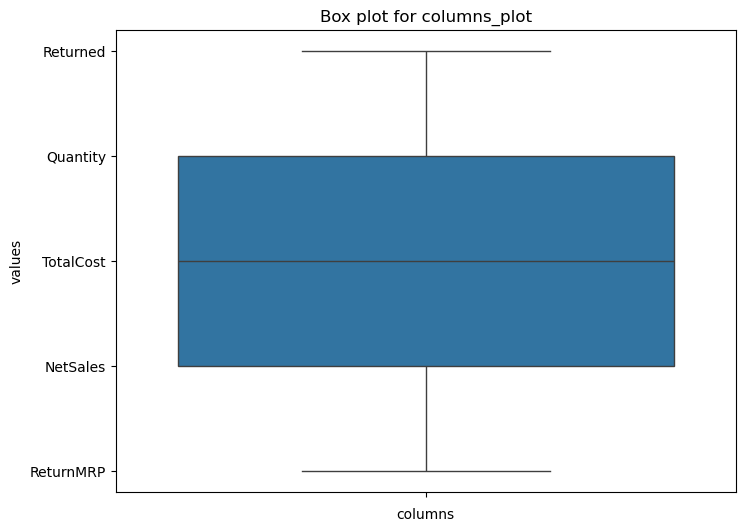

{'whiskers': [<matplotlib.lines.Line2D at 0x1973182d210>,
 'caps': [<matplotlib.lines.Line2D at 0x19731aee150>,
 'boxes': [<matplotlib.lines.Line2D at 0x19731aec950>,
 'medians': [<matplotlib.lines.Line2D at 0x19731aef6d0>,
 'fliers': [<matplotlib.lines.Line2D at 0x1973182c410>,
 'means': []}

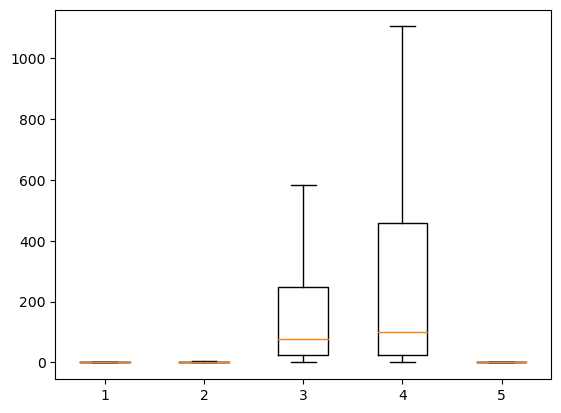

In [60]:
plt.figure(figsize=(8, 6))
sns.boxplot(data = columns_plot)
plt.title('Box plot for columns_plot')
plt.xlabel('columns')
plt.ylabel('values')
plt.show()
plt.boxplot(data1)

In [51]:
data1.head()

,Returned,Quantity,TotalCost,NetSales,ReturnMRP
0,0.0,1.0,5.63,12.81,0.0
1,0.0,0.0,54.60,0.00,0.0
2,0.0,1.0,58.20,67.51,0.0
3,0.0,1.0,43.68,54.00,0.0
4,0.0,2.0,96.32,120.48,0.0


In [52]:
#First Moment of business decision/ Mesures of Central Tendency
data1.Returned.mean()

0.0

In [53]:
data1.Returned.median()

0.0

In [54]:
data1.Returned.mode()

0    0.0
Name: Returned, dtype: float64

In [55]:
data1.Quantity.mean()

1.6424882352941177

In [56]:
data1.Quantity.median()

1.0

In [57]:
data1.Quantity.mode()

0    1.0
Name: Quantity, dtype: float64

In [58]:
data1.TotalCost.mean()

170.92265952941176

In [59]:
data1.TotalCost.median()

77.28

In [60]:
data1.TotalCost.mode()

0    584.64
Name: TotalCost, dtype: float64

In [61]:
data1.NetSales.mean()

304.5793744117647

In [62]:
data1.NetSales.median()

99.4

In [63]:
data1.NetSales.mode()

0    1104.975
Name: NetSales, dtype: float64

In [64]:
data1.ReturnMRP.mean()

0.0

In [65]:
data1.ReturnMRP.median()

0.0

In [66]:
data1.ReturnMRP.mode()

0    0.0
Name: ReturnMRP, dtype: float64

In [67]:
#second moment of business decision/ Mesures of Dispersion
data1.Returned.var()

0.0

In [68]:
data1.Returned.std()

0.0

In [69]:
range = max(data1.Returned) - min(data1.Returned)
range

0.0

In [70]:
data1.Quantity.var()

1.2018788896127888

In [71]:
data1.Quantity.std()

1.0963023714344455

In [72]:
range = max(data1.Quantity)  - min(data1.Quantity)
range

3.5

In [73]:
data1.TotalCost.var()

39290.81768667222

In [74]:
data1.TotalCost.std()

198.21911534126122

In [75]:
range = max(data1.TotalCost) - min(data1.TotalCost)
range

584.64

In [76]:
data1.NetSales.var()

155509.86179451333

In [77]:
data1.NetSales.std()

394.34738720386287

In [78]:
range = max(data1.NetSales) - min(data1.NetSales)
range

1104.975

In [79]:
data1.ReturnMRP.var()

0.0

In [80]:
data1.ReturnMRP.std()

0.0

In [81]:
range = max(data1.ReturnMRP) - min(data1.ReturnMRP)
range

0.0

In [82]:
#Third Moment of Decision
data1.Returned.skew()

0.0

In [83]:
data1.Quantity.skew()

0.3476555039001431

In [84]:
data1.TotalCost.skew()

1.2015888021632237

In [85]:
data1.NetSales.skew()

1.2070406372322595

In [86]:
data1.ReturnMRP.skew()

0.0

In [87]:
#Fourth moment of Business
data1.Returned.kurt()

0.0

In [88]:
data1.Quantity.kurt()

-0.9301715860153705

In [94]:
data1.TotalCost.kurt()

-0.04987990455168845

In [95]:
data1.NetSales.kurt()

-0.14433437901623458

In [96]:
data1.ReturnMRP.kurt()

0.0

In [8]:
#Returned Quantity
data.Returned.sum()

-24524

In [101]:
#Sales Quantity
data.Quantity.sum()

170279

In [102]:
#Total Sales
data.NetSales.sum()

81927099.29

In [103]:
#Profit 
Total_Profit = (sum(data.NetSales) + sum(data.ReturnMRP)) - sum(data.TotalCost) 
print(Total_Profit)

46003112.3500004


In [104]:
#total NetSales
sum(data.NetSales)

81927099.29000343

In [105]:
# Calculate the returned percentage
Returned_Percentage = sum(data.Returned) / sum(data.Quantity) * 100

print(Returned_Percentage)

-14.402245726131818


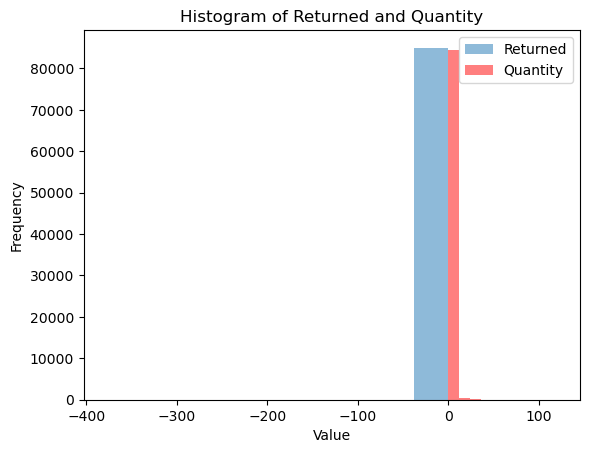

In [106]:
plt.hist(data.Returned, bins=10, alpha=0.5, label='Returned')
plt.hist(data.Quantity, bins=10, alpha=0.5, color='red', label='Quantity')

# Adding title and labels
plt.title('Histogram of Returned and Quantity')
plt.xlabel('Value')
plt.ylabel('Frequency')

# Adding a legend to differentiate the datasets
plt.legend(loc='upper right')

# Show the plot
plt.show()

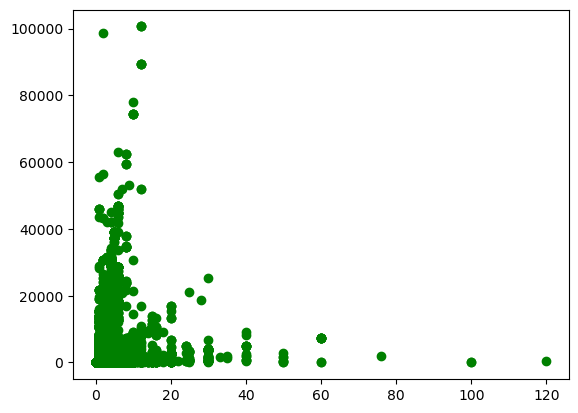

In [12]:
plt.scatter(x = data['Quantity'], y = data['NetSales'],color = 'green')

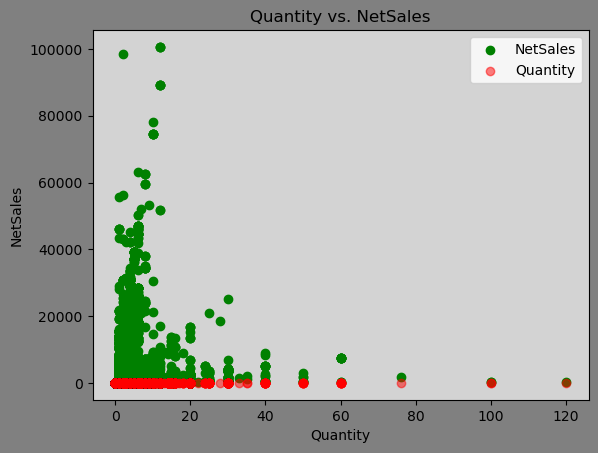

In [9]:
fig, ax = plt.subplots()
fig.patch.set_facecolor('grey')
ax.set_facecolor('lightgrey')

# Create the scatter plot
ax.scatter(data['Quantity'], data['NetSales'], color='green', label='NetSales')
ax.scatter(data['Quantity'], [0]*len(data), color='red', alpha=0.5, label='Quantity')

# Add titles and labels
ax.set_title('Quantity vs. NetSales')
ax.set_xlabel('Quantity')
ax.set_ylabel('NetSales')
ax.legend()

# Show the plot
plt.show()

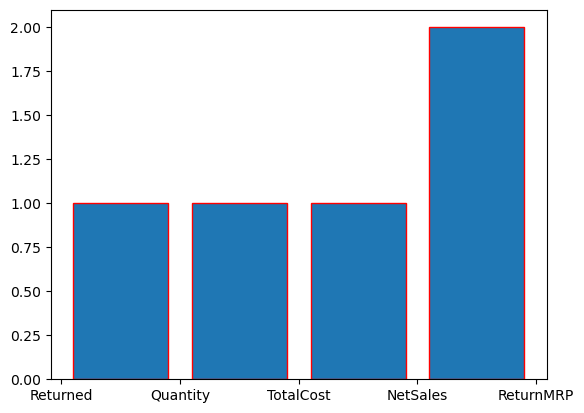

In [110]:
plt.hist(columns_plot,"auto",edgecolor ='red',rwidth= 0.8)
plt.show()

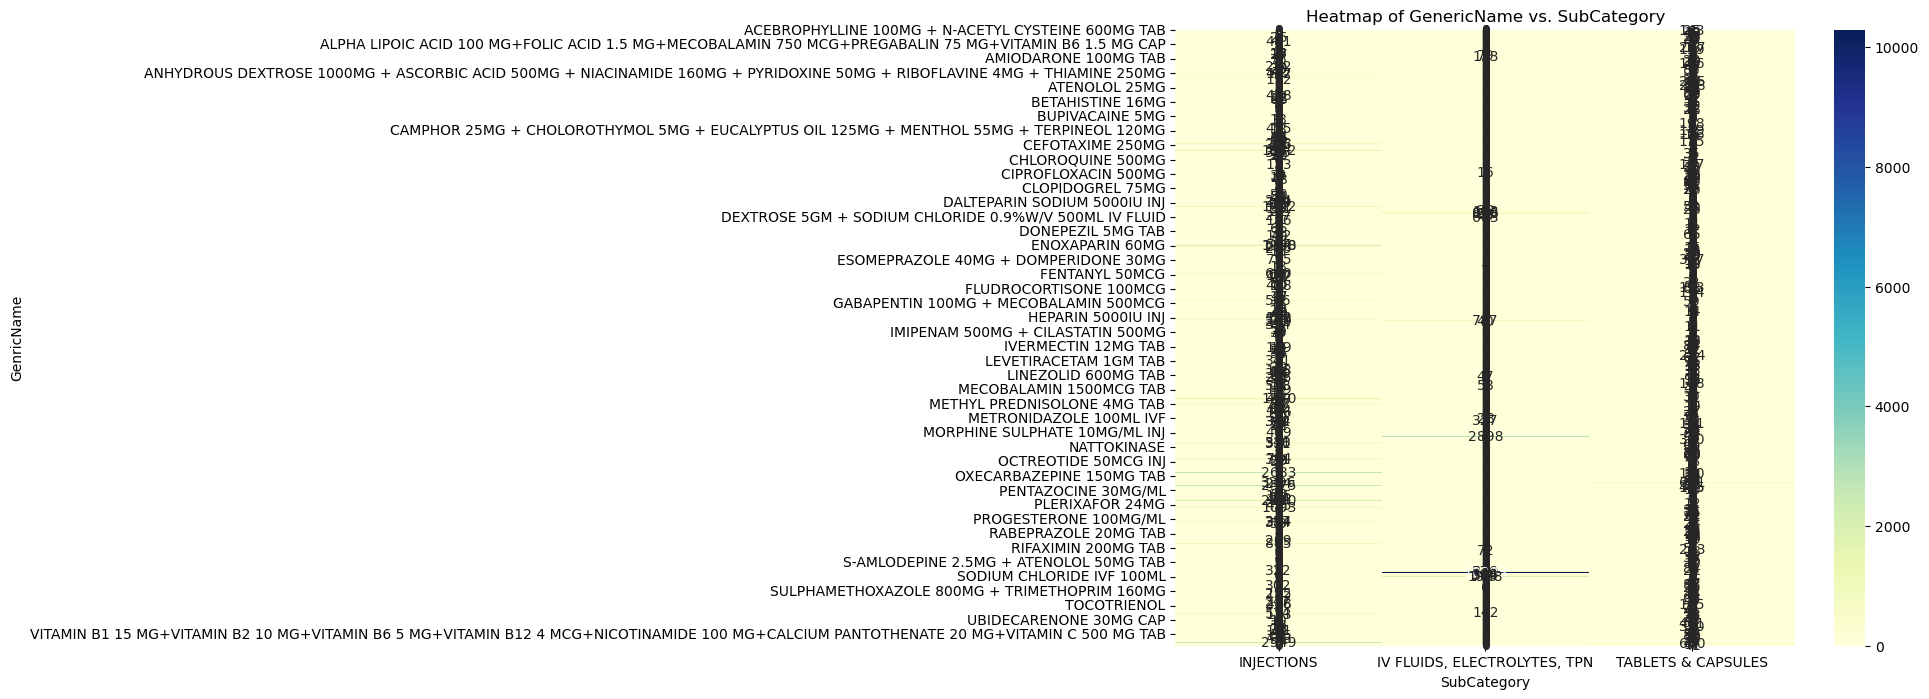

In [111]:
# Heatmap for GenericName and SubCategory
contingency_table = pd.crosstab(data['GenericName'], data['SubCategory'])

# Create the heatmap
plt.figure(figsize=(10, 8))  # Adjust the figure size as needed
sns.heatmap(contingency_table, annot=True, fmt='d', cmap='YlGnBu')

# Customize the plot
plt.title('Heatmap of GenericName vs. SubCategory')
plt.xlabel('SubCategory')
plt.ylabel('GenricName')

# Show the plot
plt.show()

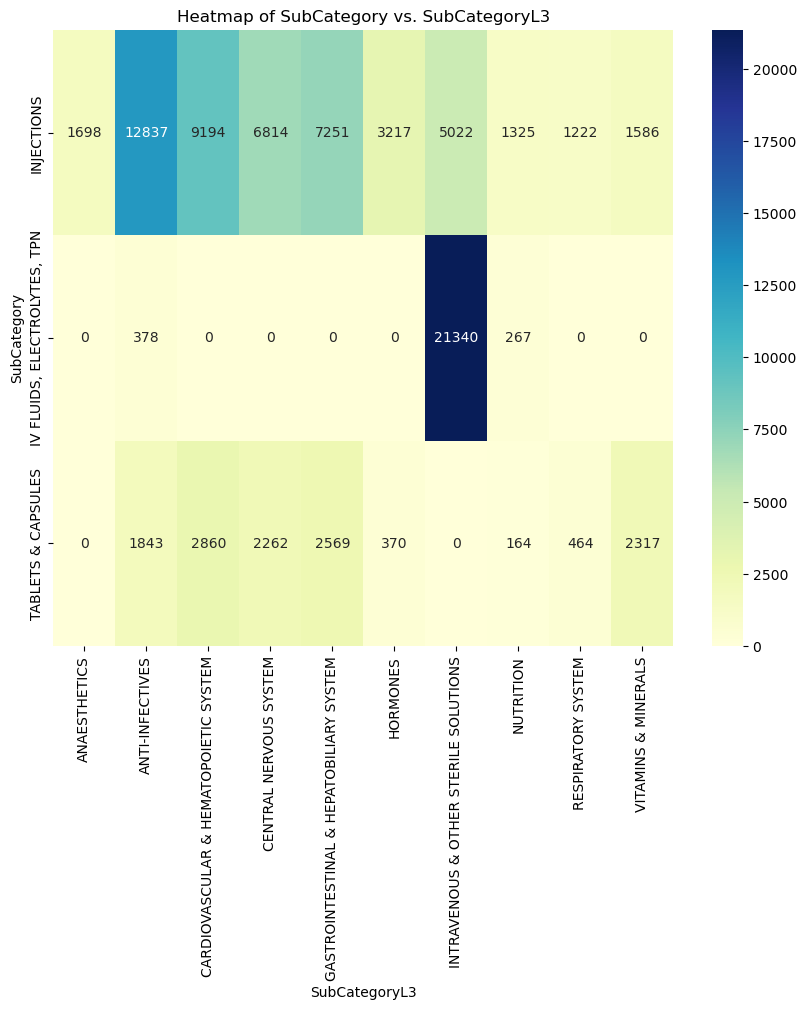

In [20]:
# Create heatmap for SubCategory and SubCategoryL3
contingency_table = pd.crosstab(data['SubCategory'], data['SubCategoryL3'])

# Create the heatmap
plt.figure(figsize=(10, 8))  # Adjust the figure size as needed
sns.heatmap(contingency_table, annot=True, fmt='d', cmap='YlGnBu')

# Customize the plot
plt.title('Heatmap of SubCategory vs. SubCategoryL3')
plt.xlabel('SubCategoryL3')
plt.ylabel('SubCategory')

# Show the plot
plt.show()

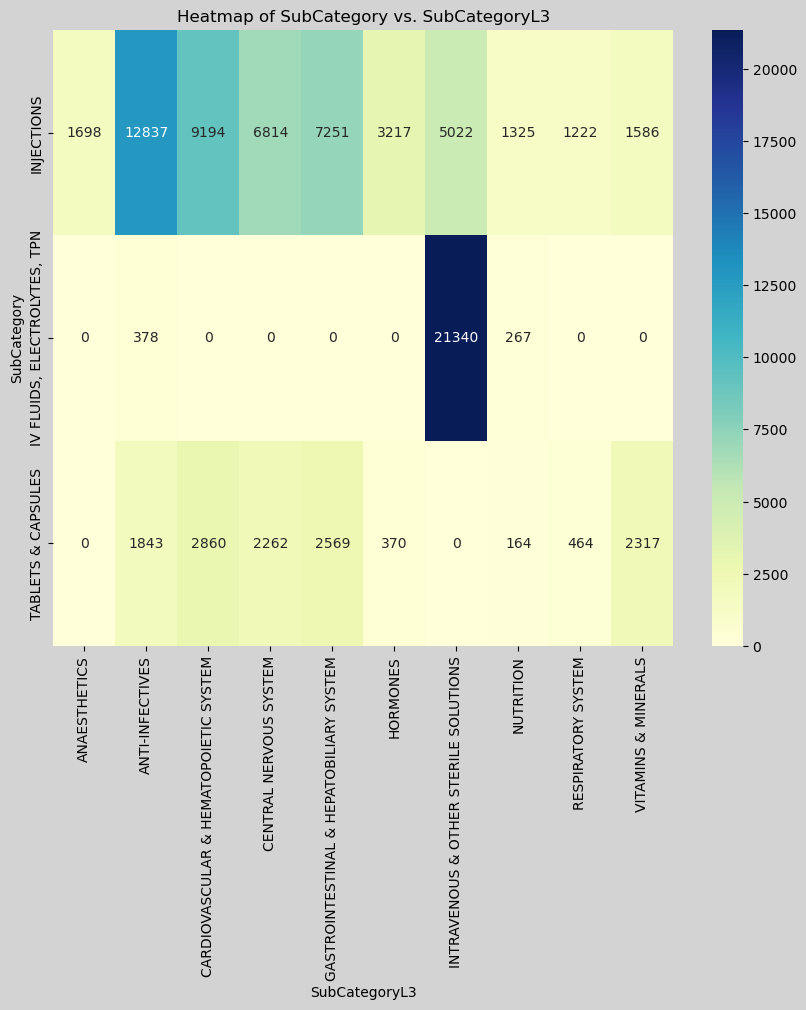

In [13]:
# Create the contingency table
contingency_table = pd.crosstab(data['SubCategory'], data['SubCategoryL3'])

# Create the figure with a grey background
fig, ax = plt.subplots(figsize=(10, 8), facecolor='lightgrey')

# Create the heatmap
sns.heatmap(contingency_table, annot=True, fmt='d', cmap='YlGnBu', ax=ax)

# Customize the plot
ax.set_title('Heatmap of SubCategory vs. SubCategoryL3')
ax.set_xlabel('SubCategoryL3')
ax.set_ylabel('SubCategory')

# Show the plot
plt.show()

largest Netsales
                            GenericName     NetSales
563                   MEROPENEM 1GM INJ  11053954.92
444               HUMAN ALBUMIN 25% INJ   7685378.00
531   LIPOSOMAL AMPHOTERICIN B 50MG INJ   5751007.64
785                REMDESIVIR 100MG INJ   4270484.50
443               HUMAN ALBUMIN 20% INJ   4134896.50
879                TIGECYCLINE 50MG INJ   3617430.96
598                 MICAFUNGIN 50MG INJ   3576446.08
727            POLYMYXIN B INJ 500000IU   3121282.42
719  PIPERACILLIN 4GM+ TAZOBACTAM 500MG   2403377.53
696              PARACETAMOL 1GM IV INJ   2288324.86
smallest NetSales
                                           GenericName  NetSales
31                                      ALTEPLASE 20MG       0.0
69                                         ANTIOXIDANT       0.0
128                            BROMOCRIPTINE 2.5MG TAB       0.0
130                                  BUPIVACAINE 0.25%       0.0
133                                BUPRENORPHINE 0.3MG   

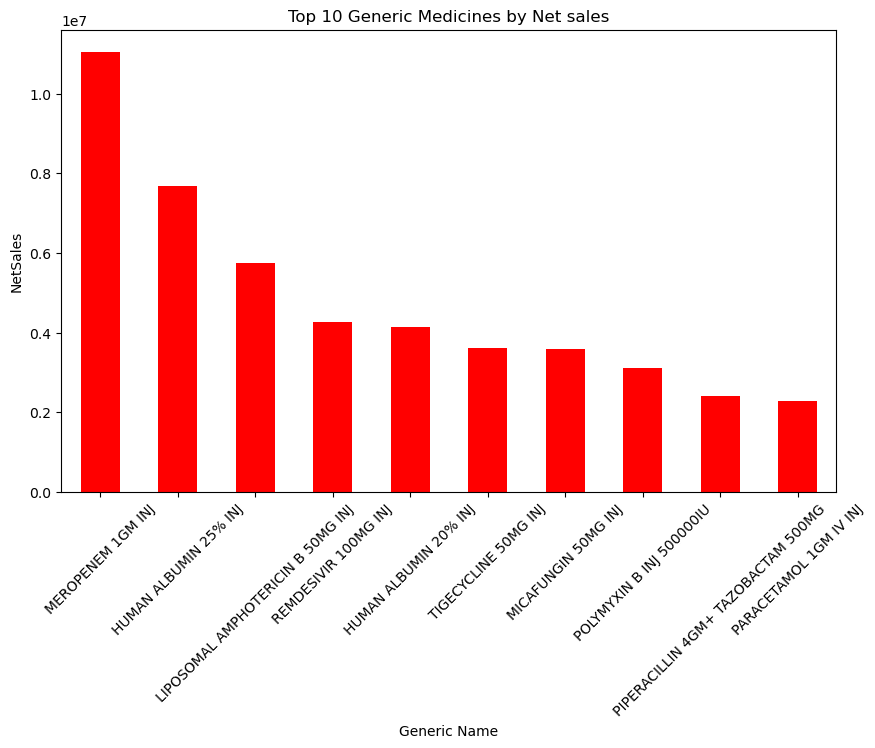

In [14]:
#GenericName NetSales
Total_Sales = data.groupby('GenericName')['NetSales'].sum().reset_index().nlargest(10,'NetSales')
print("largest Netsales")
print(Total_Sales)

Total_Sales = data.groupby('GenericName')['NetSales'].sum().reset_index().nsmallest(10,'NetSales')
print("smallest NetSales")
print(Total_Sales)

Top_generics = data.groupby('GenericName')['NetSales'].sum().sort_values(ascending=False).head(10)


plt.figure(figsize=(10, 6))
Top_generics.plot(kind = 'bar',color = 'red')
plt.xlabel('Generic Name')
plt.ylabel('NetSales')
plt.title('Top 10 Generic Medicines by Net sales')
plt.xticks(rotation = 45)
plt.show()

largest Netsales
                            GenericName     NetSales
563                   MEROPENEM 1GM INJ  11053954.92
444               HUMAN ALBUMIN 25% INJ   7685378.00
531   LIPOSOMAL AMPHOTERICIN B 50MG INJ   5751007.64
785                REMDESIVIR 100MG INJ   4270484.50
443               HUMAN ALBUMIN 20% INJ   4134896.50
879                TIGECYCLINE 50MG INJ   3617430.96
598                 MICAFUNGIN 50MG INJ   3576446.08
727            POLYMYXIN B INJ 500000IU   3121282.42
719  PIPERACILLIN 4GM+ TAZOBACTAM 500MG   2403377.53
696              PARACETAMOL 1GM IV INJ   2288324.86
smallest NetSales
                                           GenericName  NetSales
31                                      ALTEPLASE 20MG       0.0
69                                         ANTIOXIDANT       0.0
128                            BROMOCRIPTINE 2.5MG TAB       0.0
130                                  BUPIVACAINE 0.25%       0.0
133                                BUPRENORPHINE 0.3MG   

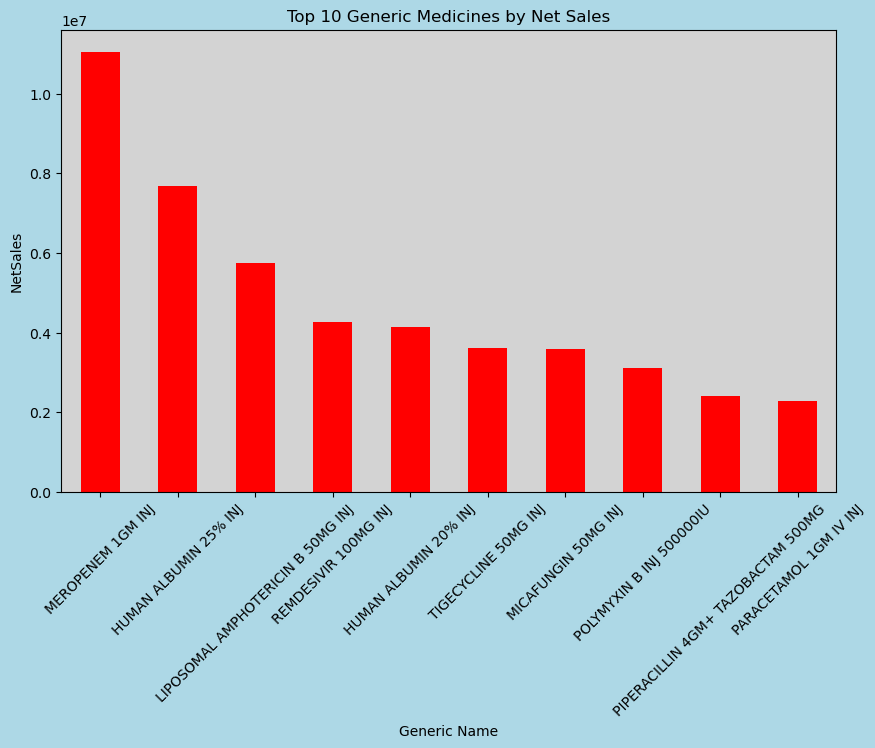

In [13]:
#GenericName NetSales
Total_Sales = data.groupby('GenericName')['NetSales'].sum().reset_index().nlargest(10,'NetSales')
print("largest Netsales")
print(Total_Sales)
Total_Sales = data.groupby('GenericName')['NetSales'].sum().reset_index().nsmallest(10,'NetSales')
print("smallest NetSales")
print(Total_Sales)

Top_generics = data.groupby('GenericName')['NetSales'].sum().sort_values(ascending=False).head(10)

fig = plt.figure(figsize=(10, 6), facecolor='lightblue')
ax = fig.add_subplot(111, facecolor='lightgrey')

# Create the bar plot
Top_generics.plot(kind='bar', color='red', ax=ax)

# Add titles and labels
ax.set_xlabel('Generic Name')
ax.set_ylabel('NetSales')
ax.set_title('Top 10 Generic Medicines by Net Sales')
ax.set_xticklabels(Top_generics.index, rotation=45)

# Show the plot
plt.show()

largest sales
                           GenericName   TotalCost
444              HUMAN ALBUMIN 25% INJ  5311845.00
531  LIPOSOMAL AMPHOTERICIN B 50MG INJ  4880379.68
443              HUMAN ALBUMIN 20% INJ  3239171.25
785               REMDESIVIR 100MG INJ  2995632.48
598                MICAFUNGIN 50MG INJ  2856546.00
563                  MEROPENEM 1GM INJ  2804662.07
445         HUMAN ALBUMIN 5% 250ML INJ  1675800.00
183    CEFTAZIDIME 2GM+AVIBACTAM 500MG  1359139.29
67                 ANIDULAFUNGIN 100MG  1233614.55
879               TIGECYCLINE 50MG INJ  1012130.56
lowest sales
                          GenericName  TotalCost
413                        FUROSEMIDE       2.69
434            HALOPERIDOL 0.25MG TAB       4.52
469                   ISONIAZID 100MG       5.71
365                   FAMOTIDINE 20MG       5.77
48                  AMITRPTYLINE 25MG       5.78
921              VITAMIN A 5000IU TAB       6.03
289                  DIAZEPAM 5MG TAB       6.17
288                 

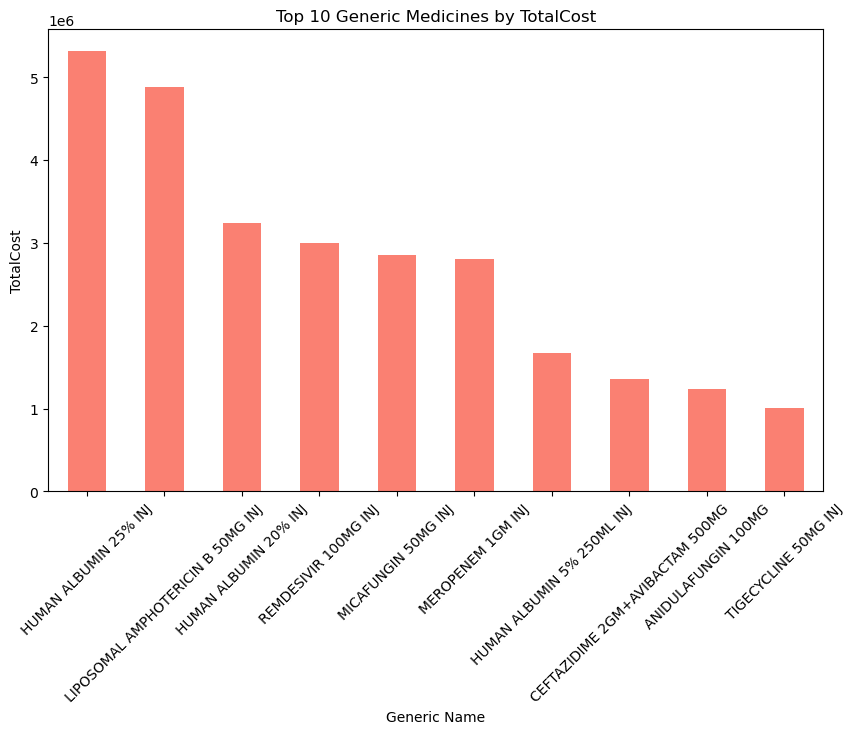

In [108]:
print("largest sales")
Total_Sales = data.groupby('GenericName')['TotalCost'].sum().reset_index().nlargest(10,'TotalCost')
print(Total_Sales)
print("lowest sales")
Total_Sales = data.groupby('GenericName')['TotalCost'].sum().reset_index().nsmallest(10,'TotalCost')
print(Total_Sales)

Top_generics = data.groupby('GenericName')['TotalCost'].sum().sort_values(ascending=False).head(10)


plt.figure(figsize=(10, 6))
Top_generics.plot(kind = 'bar',color = 'salmon')
plt.xlabel('Generic Name')
plt.ylabel('TotalCost')
plt.title('Top 10 Generic Medicines by TotalCost')
plt.xticks(rotation = 45)
plt.show()